# Actividad Guiada 2 - Sergio D'Ippolito

In [1]:
#Importo Librerias Principales
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None

In [2]:
#Creación del DataFrame basado en el archivo csv
df = pd.read_csv('./estaciones_bici.csv',delimiter=';')

In [3]:
#Estructura y estadisticas del DataFrame
df.describe()

Unnamed: 0     available     connected      estation          free  \
count  27547.000000  27547.000000  27547.000000  27547.000000  27547.000000   
mean   13773.000000      8.974444      0.996261    138.449196     10.629397   
std     7952.278269      7.307137      0.061035     79.657747      7.492671   
min        0.000000      0.000000      0.000000      1.000000      0.000000   
25%     6886.500000      3.000000      1.000000     69.000000      4.000000   
50%    13773.000000      8.000000      1.000000    139.000000     10.000000   
75%    20659.500000     14.000000      1.000000    207.000000     15.000000   
max    27546.000000     40.000000      1.000000    276.000000     40.000000   

          open        ticket         total  
count  27547.0  27547.000000  27547.000000  
mean       1.0      0.503794     19.915381  
std        0.0      0.499995      5.570912  
min        1.0      0.000000     10.000000  
25%        1.0      0.000000     15.000000  
50%        1.0      1.000000     20.000000  
75%        1.0      1.000000     20.000000  
max        1.0      1.000000     40.000000

In [4]:
#Obtengo una muestra de los datos, lo hago sin la opcion head() para ver también los últimos registros
df

Unnamed: 0                       _id  available  connected  \
0               0  5c6050a42554172704fccdc0          9          1   
1               1  5c6050a42554172704fccdc1          6          1   
2               2  5c605be225541729b7d50885         20          1   
3               3  5c605be225541729b7d50886          6          1   
4               4  5c605be225541729b7d50887          9          1   
...           ...                       ...        ...        ...   
27542       27542  5c61face25541729b7d57419          0          1   
27543       27543  5c61face25541729b7d5741a         15          1   
27544       27544  5c61face25541729b7d5741b          1          1   
27545       27545  5c61face25541729b7d5741c          1          1   
27546       27546  5c61face25541729b7d5741d          8          1   

                 download_date  estation  free  open  ticket  total  \
0      2019-02-10 17:25:37.787        64    11     1       0     20   
1      2019-02-10 17:25:37.787        73    14     1       1     20   
2      2019-02-10 18:13:39.827        63     0     1       1     20   
3      2019-02-10 18:13:39.827        64    14     1       0     20   
4      2019-02-10 18:13:39.827        65    10     1       1     19   
...                        ...       ...   ...   ...     ...    ...   
27542  2019-02-11 23:44:00.786       260    20     1       0     20   
27543  2019-02-11 23:44:00.786       261     4     1       0     19   
27544  2019-02-11 23:44:00.786       268     9     1       1     10   
27545  2019-02-11 23:44:00.786       269    14     1       0     15   
27546  2019-02-11 23:44:00.786       276    12     1       1     20   

                       updated  
0      2019-02-10 17:21:13.000  
1      2019-02-10 17:24:13.000  
2      2019-02-10 18:09:16.000  
3      2019-02-10 18:12:15.000  
4      2019-02-10 18:09:16.000  
...                        ...  
27542  2019-02-11 23:42:16.000  
27543  2019-02-11 23:39:16.000  
27544  2019-02-11 23:42:16.000  
27545  2019-02-11 23:39:16.000  
27546  2019-02-11 23:42:16.000  

[27547 rows x 11 columns]

In [5]:
#Obtengo la cantidad de registros que tienen en la columna total el valor de 30
df.query('total==30').total.count()

1098

In [7]:
#Defino un nuevo DataFrame donde agrupo por estation y avaiable, a su vez agrego data para encontrar
#las media de la agrupación
df1 = df.groupby("estation")["available"].agg(['mean'])
df1

mean
estation           
1         12.040000
2          2.070000
3          3.300000
4          3.100000
5          8.730000
...             ...
272       13.444444
273        6.242424
274        4.989899
275       16.222222
276       15.323232

[276 rows x 1 columns]

In [8]:
#Busco el valor mas alto de la columna media y obtengo el numero de estación
estation_number_h_mean = df1.loc[df1['mean'].idxmax()]
estation_number_h_mean

mean    31.26
Name: 50, dtype: float64

# Visualización 

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

In [10]:
#Genero otro DataFrame de la estación que me interesa (50)
df2 = df.loc[df['estation'] == 50]
df2

Unnamed: 0                       _id  available  connected  \
74             74  5c605be225541729b7d508cd         39          1   
350           350  5c605f8625541729b7d509e1         36          1   
625           625  5c60632925541729b7d50af4         33          1   
901           901  5c6066cf25541729b7d50c08         31          1   
1177         1177  5c606a7325541729b7d50d1c         33          1   
...           ...                       ...        ...        ...   
26239       26239  5c61ec4225541729b7d56f02         32          1   
26515       26515  5c61efe525541729b7d57016         33          1   
26791       26791  5c61f38825541729b7d5712a         33          1   
27067       27067  5c61f72b25541729b7d5723e         32          1   
27343       27343  5c61face25541729b7d57352         32          1   

                 download_date  estation  free  open  ticket  total  \
74     2019-02-10 18:13:39.827        50     1     1       1     40   
350    2019-02-10 18:29:13.135        50     4     1       1     40   
625    2019-02-10 18:44:43.728        50     7     1       1     40   
901    2019-02-10 19:00:14.475        50     9     1       1     40   
1177   2019-02-10 19:15:48.800        50     7     1       1     40   
...                        ...       ...   ...   ...     ...    ...   
26239  2019-02-11 22:41:56.937        50     8     1       1     40   
26515  2019-02-11 22:57:27.760        50     7     1       1     40   
26791  2019-02-11 23:12:58.602        50     7     1       1     40   
27067  2019-02-11 23:28:29.903        50     8     1       1     40   
27343  2019-02-11 23:44:00.786        50     8     1       1     40   

                       updated  
74     2019-02-10 18:12:15.000  
350    2019-02-10 18:24:14.000  
625    2019-02-10 18:42:14.000  
901    2019-02-10 19:00:14.000  
1177   2019-02-10 19:15:16.000  
...                        ...  
26239  2019-02-11 22:39:17.000  
26515  2019-02-11 22:57:17.000  
26791  2019-02-11 23:12:16.000  
27067  2019-02-11 23:27:14.000  
27343  2019-02-11 23:42:15.000  

[100 rows x 11 columns]

(array([23., 12.,  6.,  5., 14., 27.,  2.,  4.,  0.,  7.]),
 array([26. , 27.4, 28.8, 30.2, 31.6, 33. , 34.4, 35.8, 37.2, 38.6, 40. ]),
 <a list of 10 Patch objects>)

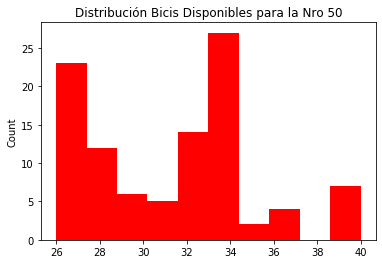

In [11]:
#Defino parametros para matplotlib
plt.ylabel('Count')
plt.title('Distribución Bicis Disponibles para la Nro 50')
plt.hist(df2['available'],color='red')

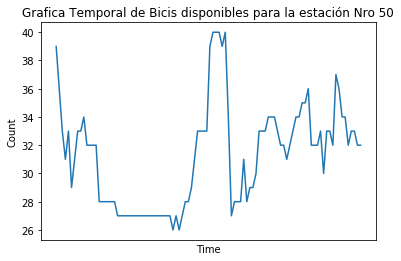

In [16]:
plt.ylabel('Count')
plt.title('Grafica Temporal de Bicis disponibles para la estación Nro 50')
plt.xticks([])
plt.xlabel('Time')
plt.plot(df2['updated'], df2['available'])

# Análisis Extra 

In [18]:
#Genero nueva columna de costo basada en las free
df['Cost'] = df.apply(lambda row: row.free * 0.2, axis = 1)

In [19]:
#Reordeno Columnas
df = df[['_id','available','Cost','connected','download_date','estation','free','open','ticket','total','updated']]

In [20]:
df

_id  available  Cost  connected  \
0      5c6050a42554172704fccdc0          9   2.2          1   
1      5c6050a42554172704fccdc1          6   2.8          1   
2      5c605be225541729b7d50885         20   0.0          1   
3      5c605be225541729b7d50886          6   2.8          1   
4      5c605be225541729b7d50887          9   2.0          1   
...                         ...        ...   ...        ...   
27542  5c61face25541729b7d57419          0   4.0          1   
27543  5c61face25541729b7d5741a         15   0.8          1   
27544  5c61face25541729b7d5741b          1   1.8          1   
27545  5c61face25541729b7d5741c          1   2.8          1   
27546  5c61face25541729b7d5741d          8   2.4          1   

                 download_date  estation  free  open  ticket  total  \
0      2019-02-10 17:25:37.787        64    11     1       0     20   
1      2019-02-10 17:25:37.787        73    14     1       1     20   
2      2019-02-10 18:13:39.827        63     0     1       1     20   
3      2019-02-10 18:13:39.827        64    14     1       0     20   
4      2019-02-10 18:13:39.827        65    10     1       1     19   
...                        ...       ...   ...   ...     ...    ...   
27542  2019-02-11 23:44:00.786       260    20     1       0     20   
27543  2019-02-11 23:44:00.786       261     4     1       0     19   
27544  2019-02-11 23:44:00.786       268     9     1       1     10   
27545  2019-02-11 23:44:00.786       269    14     1       0     15   
27546  2019-02-11 23:44:00.786       276    12     1       1     20   

                       updated  
0      2019-02-10 17:21:13.000  
1      2019-02-10 17:24:13.000  
2      2019-02-10 18:09:16.000  
3      2019-02-10 18:12:15.000  
4      2019-02-10 18:09:16.000  
...                        ...  
27542  2019-02-11 23:42:16.000  
27543  2019-02-11 23:39:16.000  
27544  2019-02-11 23:42:16.000  
27545  2019-02-11 23:39:16.000  
27546  2019-02-11 23:42:16.000  

[27547 rows x 11 columns]

# Visualización de Costo Agrupando

In [21]:
df2 = df.groupby("estation")["Cost"].agg(['sum'])
df2

sum
estation       
1         237.6
2         258.6
3         334.0
4         438.0
5         125.4
...         ...
272        30.8
273       173.4
274       198.0
275        74.8
276        90.4

[276 rows x 1 columns]

In [22]:
#Busco el Costo mas alto y obtengo el número de estación
h_cost = df2.loc[df2['sum'].idxmax()]
h_cost

sum    661.2
Name: 194, dtype: float64

In [23]:
#Filtro por estación Nro 194
df3 = df.loc[df['estation'] == 194]
df3

_id  available  Cost  connected  \
177    5c605be225541729b7d50934          9   6.2          1   
453    5c605f8625541729b7d50a48         10   6.0          1   
728    5c60632925541729b7d50b5b         10   6.0          1   
1004   5c6066cf25541729b7d50c6f          9   6.2          1   
1280   5c606a7325541729b7d50d83          9   6.2          1   
...                         ...        ...   ...        ...   
26342  5c61ec4225541729b7d56f69          9   6.2          1   
26618  5c61efe525541729b7d5707d          8   6.4          1   
26894  5c61f38825541729b7d57191          8   6.4          1   
27170  5c61f72b25541729b7d572a5          8   6.4          1   
27446  5c61face25541729b7d573b9         10   6.0          1   

                 download_date  estation  free  open  ticket  total  \
177    2019-02-10 18:13:39.827       194    31     1       1     40   
453    2019-02-10 18:29:13.135       194    30     1       1     40   
728    2019-02-10 18:44:43.728       194    30     1       1     40   
1004   2019-02-10 19:00:14.475       194    31     1       1     40   
1280   2019-02-10 19:15:48.800       194    31     1       1     40   
...                        ...       ...   ...   ...     ...    ...   
26342  2019-02-11 22:41:56.937       194    31     1       1     40   
26618  2019-02-11 22:57:27.760       194    32     1       1     40   
26894  2019-02-11 23:12:58.602       194    32     1       1     40   
27170  2019-02-11 23:28:29.903       194    32     1       1     40   
27446  2019-02-11 23:44:00.786       194    30     1       1     40   

                       updated  
177    2019-02-10 18:09:16.000  
453    2019-02-10 18:24:14.000  
728    2019-02-10 18:39:13.000  
1004   2019-02-10 19:00:14.000  
1280   2019-02-10 19:12:12.000  
...                        ...  
26342  2019-02-11 22:39:17.000  
26618  2019-02-11 22:54:20.000  
26894  2019-02-11 23:12:16.000  
27170  2019-02-11 23:27:15.000  
27446  2019-02-11 23:42:16.000  

[100 rows x 11 columns]

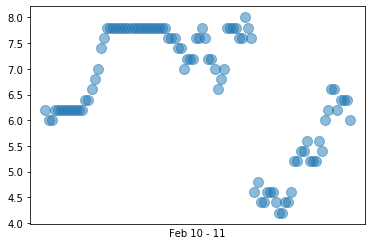

In [35]:
#Grafico tipo Scatter para entender en funcion a los días como varia la nueva variable inventada Costo
plt.scatter(df3['updated'], df3['Cost'], s=100, alpha=0.5)
plt.xticks([])
plt.xlabel('Feb 10 - 11')
plt.show()